#Twitter Sentiment Analysis using NLP Techniques

In [ ]:
import numpy as np
import pandas as pd
import nltk
#we can download package based on our preference are we can dwnld all 
nltk.download('all')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
import json
from nltk.sentiment.util import *
from textblob import TextBlob

#Importing Data

- importing a Json data into to check the raw data

In [ ]:
with open('tweets.json') as jfile:
  d = json.load(jfile)

In [ ]:
d

#Converting JSON to DataFrame

- so we can easily read and understand the data

In [ ]:
data = pd.DataFrame(d).T

In [ ]:
data.head()

,tweet_author,tweet_text
1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


#Exploration of Data

In [ ]:
data.shape

(43347, 2)

In [ ]:
data.dtypes

tweet_author    object
tweet_text      object
dtype: object

In [ ]:
data.isnull().sum()

tweet_author    0
tweet_text      0
dtype: int64

In [ ]:
data.notnull().sum()

tweet_author    43347
tweet_text      43347
dtype: int64

In [ ]:
cols = data.columns

for col in cols :
  print(col,data[col].nunique())

tweet_author 9292
tweet_text 41776


In [ ]:
for col in cols :
  print(col,data[col].value_counts())

tweet_author Patient Power            1603
Paperbirds_Hematology    1510
VJHemOnc                 1079
Oncology Tube             714
Medivizor                 663
                         ... 
Streetwise Reports          1
Onco.com                    1
Investor's Champion         1
21                          1
𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹               1
Name: tweet_author, Length: 9292, dtype: int64
tweet_text chronic lymphocytic leukemia慢性リンパ性白血病                                                                                                                                                                            72
New #CLL research study now available. There is no placebo. See if you qualify here: https://t.co/oBIuJz9nKl                                                                                                     69
Looking for new solutions for #CLL? @PatientPower explores CLL treatment w/ expert Dr. Jeff Sharman. Check it out! https://t.co/yG2eS5NxLk                                     

In [ ]:
for col in cols :
  print(col,data[col].unique())

tweet_author ['Hematopoiesis News' 'Michael Wang, MD' '1stOncology' ...
 'Joy is a Lifestyle' 'Micheál 🇮🇪' '𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹']
tweet_text ['⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'
 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'
 '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'
 ...
 'Zusatznutzen von #Idelalisib ist weder für #CLL noch für refraktäres follikuläres Lymphom belegt https://t.co/WRtTkZ0PiY'
 '#Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTHERAPY OUTCOME IN CHRONIC LYMPHOCYTIC LEUKEMIA. (2014) http://t.co/rWZIOkjnka'
 '#Hematología MUTATIONS IN TLR/MYD88 PATHWAY IDENTIFY A SUBSET

#Cleaning Data
- This will remove the urls,upper,lower case,special characters,hastags,digits,html tags and numbers.
- Then based on Punctuation like (,),(.),(!)..etc we are sperating the data and also removing that punctuation
- Then we are Performing the tokenization method to split each and every word so, in further analysis we can use that use in for further analysis.

In [ ]:
stopword = stopwords.words('english')

def clean_data(data):
  data = data.lower()
  data = re.sub(r'[^(a-zA-Z)\s]','', data)
     #     remove urls
  data = re.sub(r'http\S+', " ", data)
 #     remove mentions
  data = re.sub(r'@\w+',' ',data)
 #     remove hastags
  data = re.sub(r'#\w+', ' ',data)
#     remove digits
  data = re.sub(r'\d+()', ' ', data)
#     remove html tags and umber
  data = re.sub('r<.*?>',' ', data)
 #     remove stop words 
  data = data.split()
  data = " ".join([word for word in data if not word in stopword])
  return data
data['tweet_text']=data['tweet_text'].apply(lambda x:clean_data(x))
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

data['tweet_text']= data['tweet_text'].apply(lambda x: remove_punct(x))
#Tokenization of the text data
def tokenization(text):
    text = re.split('\W+', text)
    return text
data['tweet_text'] = data['tweet_text'].apply(lambda x: tokenization(x.lower()))

In [ ]:
df = data['tweet_text']

In [ ]:
df

1374140386071961602    [scientists, conducted, phase, ii, study, acal...
1374032432173842437    [phase, acalabrutinibvenetoclax, av, trial, st...
1373902876553048065          [nice, backs, astrazenecas, calquence, cll]
1373656782367813635    [acalabrutinib, valuable, option, pts, intoler...
1372941634334232586    [nice, recommended, use, acalabrutinib, patien...
                                             ...                        
551103473643945985                [hanging, friends, ff, cll, happiness]
551102786675290112                [hanging, friends, ff, cll, happiness]
550969541186953217     [zusatznutzen, von, idelalisib, ist, weder, fr...
550941480525635584     [hematologa, ptk, expression, immunochemothera...
550579446537678849     [hematologa, mutations, tlrmyd, pathway, ident...
Name: tweet_text, Length: 43347, dtype: object

#Stemming and Lemitization

#Stemming
- when we convert textual data into features then we use stemming
- once we have features only we can create a model for textual data using NLP
- it is mostly used to remove suffic word from text which from same meaning

In [ ]:
porter = nltk.PorterStemmer()
def stemming(text):
    text = [porter.stem(word) for word in text]
    return text
df = df.apply(lambda x: stemming(x))

In [ ]:
lem = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [lem.lemmatize(word) for word in text]
    return text
df = df.apply(lambda x: lemmatizer(x))

In [ ]:
df

1374140386071961602    [scientist, conduct, phase, ii, studi, acalabr...
1374032432173842437    [phase, acalabrutinibvenetoclax, av, trial, st...
1373902876553048065             [nice, back, astrazeneca, calquenc, cll]
1373656782367813635    [acalabrutinib, valuabl, option, pt, intoler, ...
1372941634334232586    [nice, recommend, use, acalabrutinib, patient,...
                                             ...                        
551103473643945985                        [hang, friend, ff, cll, happi]
551102786675290112                        [hang, friend, ff, cll, happi]
550969541186953217     [zusatznutzen, von, idelalisib, ist, weder, fr...
550941480525635584     [hematologa, ptk, express, immunochemotherapi,...
550579446537678849     [hematologa, mutat, tlrmyd, pathway, identifi,...
Name: tweet_text, Length: 43347, dtype: object

#Stanford NLP

In [ ]:
from nltk.tag.stanford import StanfordNERTagger
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip

nltk.download('punkt')

st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')

--2022-11-11 10:26:26--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2022-11-11 10:26:26--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip.1’

stanford-ner-2018-1 100%[===================>] 172.00M  5.06MB/s    in 32s     

2022-11-11 10:26:59 (5.30 MB/s) - ‘stanford-ner-2018-10-16.zip.1’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
val = [item if isinstance(df, str) else " ".join(item) for item in df ]
seen = set()
val = [x for x in val if x not in seen and not seen.add(x)]

In [ ]:
text = st.tag(val)

In [ ]:
entity= pd.DataFrame(text,columns=['Entity','Entity Type'])

#Here We Remove Entities_type column from data we does not requierd 

all_entities = (entity.groupby(by=['Entity']).size().sort_values(ascending=False).reset_index().rename(columns={0 : 'Frequency'}))
all_entities.head(10)


,Entity,Frequency
0,acalabrutinib,1306
1,calquenc,893
2,patient,790
3,covid,694
4,astrazeneca,598
5,cll,562
6,trial,425
7,lymphocyt,388
8,chronic,351
9,leukemia,342


In [ ]:
all_entities.shape

(5150, 2)

In [ ]:
all_entities.to_csv('objective1.csv')

#Sentiment/Polarity of each Author

In [ ]:
data['tweet_text'] = data['tweet_text'].astype('str')
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
data['Polarity'] = data['tweet_text'].apply(get_polarity)

In [ ]:
data.to_csv('objective2.csv')

In [ ]:
data.head(20)

,tweet_author,tweet_text,Polarity
1374140386071961602,Hematopoiesis News,"['scientists', 'conducted', 'phase', 'ii', 'st...",0.000000
1374032432173842437,"Michael Wang, MD","['phase', 'acalabrutinibvenetoclax', 'av', 'tr...",0.000000
1373902876553048065,1stOncology,"['nice', 'backs', 'astrazenecas', 'calquence',...",0.600000
1373656782367813635,Toby Eyre,"['acalabrutinib', 'valuable', 'option', 'pts',...",0.100000
1372941634334232586,Lymphoma Hub,"['nice', 'recommended', 'use', 'acalabrutinib'...",0.600000
1372927482278539265,David Ledger,"['nice', 'backs', 'astrazenecas', 'calquence',...",0.600000
1372911723305394179,N Wales Cancer Forum,"['england', 'decisions', 'usually', 'come', 'w...",-0.250000
1372888121159868423,European Pharmaceutical Review,"['astrazenecas', 'calquence', 'acalabrutinib',...",0.000000
1372866915081797632,Graham Collins,"['superstar', 'tobyeyre', 'responding', 'excel...",0.800000
1372825553837944834,CLL Ireland,"['cll', 'patients', 'know', 'drug', 'ibrutinib...",0.045455


In [ ]:
data.Polarity.unique()

array([ 0.        ,  0.6       ,  0.1       , ..., -0.025     ,
       -0.1       ,  0.06927273])

In [ ]:
data1 = data

In [ ]:
def overall_polarity(value):
  if value > 0.5 :
    return "Positive"
  else :
    return "Negative"

data1['overall_polarity'] = data1['Polarity'].map(overall_polarity)
data1.head()

,tweet_author,tweet_text,Polarity,overall_polarity
1374140386071961602,Hematopoiesis News,"['scientists', 'conducted', 'phase', 'ii', 'st...",0.0,Negative
1374032432173842437,"Michael Wang, MD","['phase', 'acalabrutinibvenetoclax', 'av', 'tr...",0.0,Negative
1373902876553048065,1stOncology,"['nice', 'backs', 'astrazenecas', 'calquence',...",0.6,Positive
1373656782367813635,Toby Eyre,"['acalabrutinib', 'valuable', 'option', 'pts',...",0.1,Negative
1372941634334232586,Lymphoma Hub,"['nice', 'recommended', 'use', 'acalabrutinib'...",0.6,Positive


In [ ]:
data2 = data1[['tweet_author','overall_polarity']]
data2

,tweet_author,overall_polarity
1374140386071961602,Hematopoiesis News,Negative
1374032432173842437,"Michael Wang, MD",Negative
1373902876553048065,1stOncology,Positive
1373656782367813635,Toby Eyre,Negative
1372941634334232586,Lymphoma Hub,Positive
...,...,...
551103473643945985,Joy is a Lifestyle,Positive
551102786675290112,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,Positive
550969541186953217,IQWiG,Negative
550941480525635584,Medibooks,Negative


In [ ]:
data2.to_csv('objective3.csv')

In [ ]:
all_entities.Frequency.unique()

array([1306,  893,  790,  694,  598,  562,  425,  388,  351,  342,  340,
        339,  282,  266,  264,  263,  247,  244,  196,  194,  192,  191,
        183,  166,  159,  149,  145,  143,  139,  134,  132,  130,  125,
        123,  122,  120,  110,  103,  101,   98,   92,   91,   90,   89,
         88,   84,   83,   80,   79,   77,   76,   74,   73,   71,   70,
         69,   68,   66,   65,   63,   62,   61,   60,   57,   56,   55,
         54,   53,   52,   51,   50,   49,   48,   47,   46,   45,   44,
         43,   42,   41,   40,   39,   38,   36,   35,   34,   33,   32,
         31,   30,   29,   28,   27,   26,   25,   24,   23,   22,   21,
         20,   19,   18,   17,   16,   15,   14,   13,   12,   11,   10,
          9,    8,    7,    6,    5,    4,    3,    2,    1])

In [ ]:
all = all_entities

In [ ]:
def overall_polarity1(value):
  if value > 130 :
    return "Positive"
  else :
    return "Negative"

all['overall_polarity'] = all['Frequency'].map(overall_polarity1)
all.head()

,Entity,Frequency,overall_polarity
0,acalabrutinib,1306,Positive
1,calquenc,893,Positive
2,patient,790,Positive
3,covid,694,Positive
4,astrazeneca,598,Positive


In [ ]:
all.to_csv('objective4.csv')

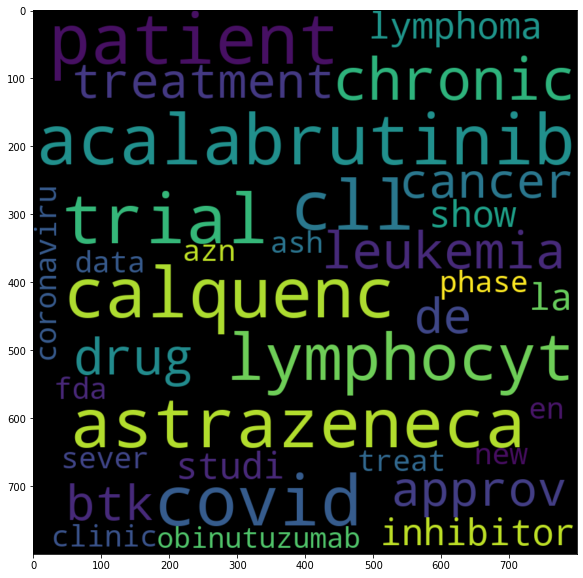

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (10,10))
word_cloud= WordCloud(width = 800 , height = 800).generate(" ".join(all[all.overall_polarity == 'Positive'].Entity))
plt.imshow(word_cloud , interpolation = 'bilinear')